In [1]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

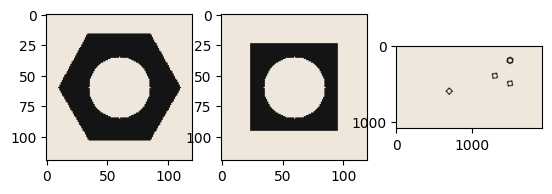

In [2]:
hexnut_template = cv.imread(r"E:\assignment 3\hexnut_template.png", cv.IMREAD_COLOR)
squarenut_template =  cv.imread(r"E:\assignment 3\squarenut_template.png", cv.IMREAD_COLOR)
conveyor_f100 =  cv.imread(r"E:\assignment 3\conveyor_f100.png", cv.IMREAD_COLOR)

fig, ax = plt. subplots(1,3)
ax[0].imshow(cv.cvtColor(hexnut_template, cv.COLOR_RGB2BGR))
ax[1].imshow(cv.cvtColor(squarenut_template, cv.COLOR_RGB2BGR))
ax[2].imshow(cv.cvtColor(conveyor_f100, cv.COLOR_RGB2BGR))
plt.show()

In [3]:
gray_hexnut_template = cv.cvtColor(hexnut_template, cv.COLOR_BGR2GRAY)
gray_squarenut_template = cv.cvtColor(squarenut_template, cv.COLOR_BGR2GRAY)
gray_conveyor_f100 = cv.cvtColor(conveyor_f100, cv.COLOR_BGR2GRAY)

Treshold value - 20.0
Treshold value - 20.0
Treshold value - 20.0


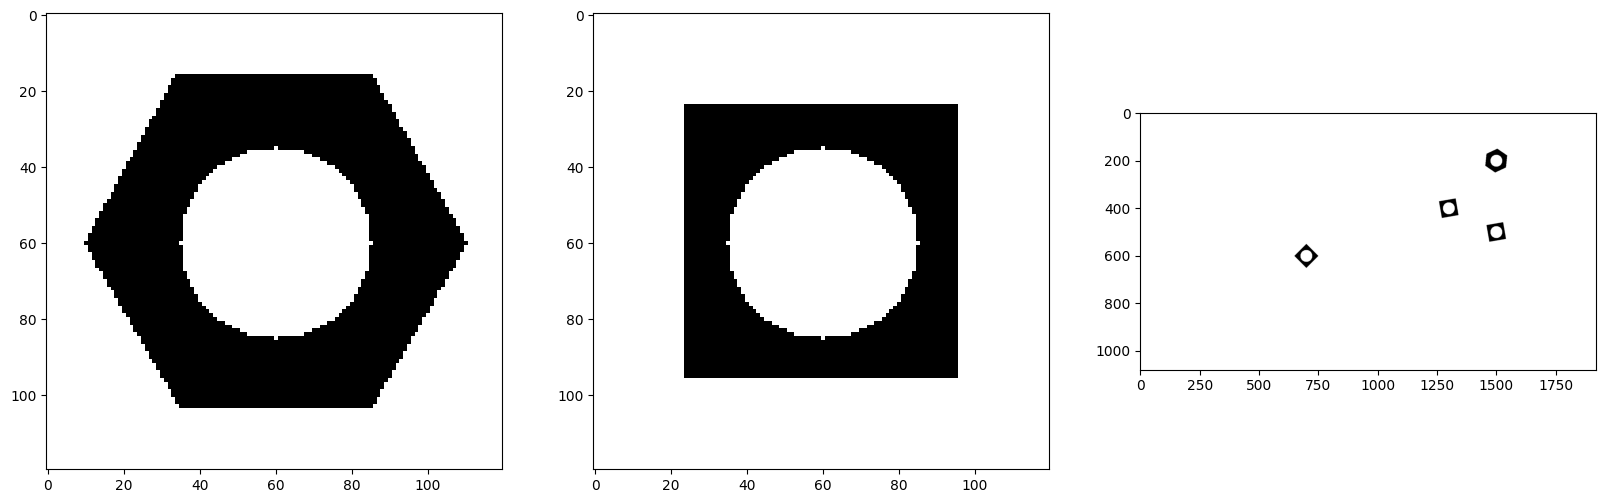

In [11]:
gray_img = [gray_hexnut_template, gray_squarenut_template, gray_conveyor_f100]
fig, ax = plt. subplots(1,3, figsize = (20, 20))

otsu_images = []
for i in range(3):
    th,im = cv.threshold(gray_img[i],0,255,cv.THRESH_BINARY+cv.THRESH_OTSU)
    otsu_images.append(im)
    ax[i].imshow(cv.cvtColor(im, cv.COLOR_RGB2BGR))
    print('Treshold value -',th)
    
plt.show()

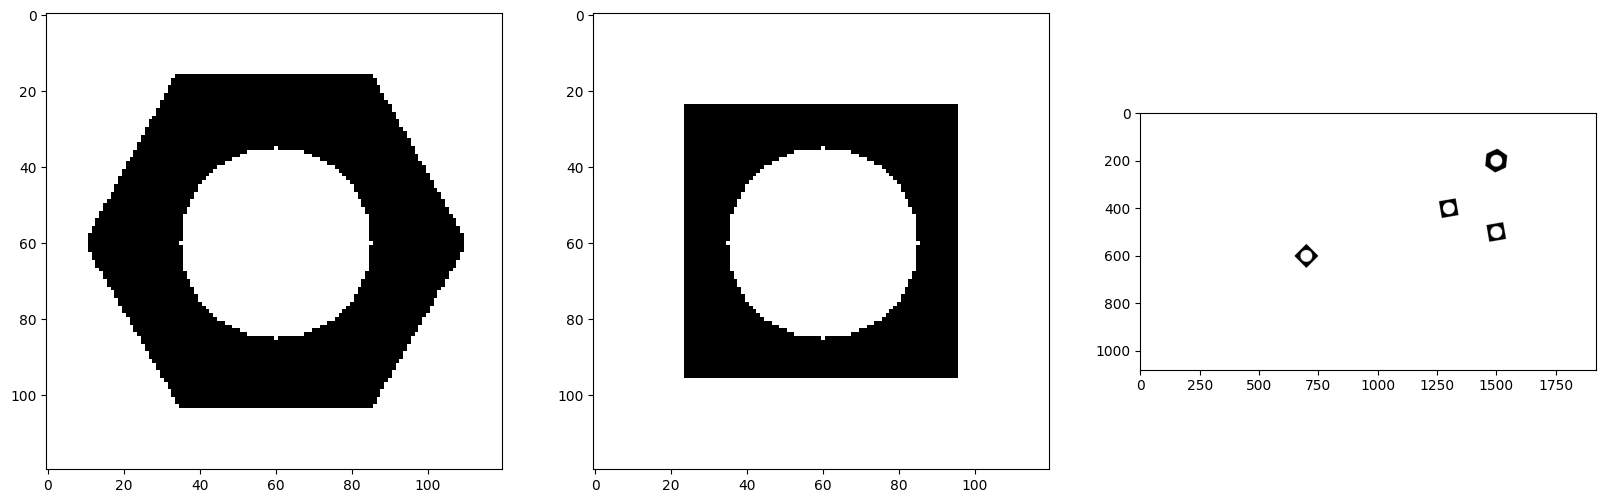

In [12]:
closing_images = []
fig, ax = plt. subplots(1,3, figsize = (20, 20))
kernel = np.ones((3,3),np.uint8)

for j in range(3):
    closing = cv.morphologyEx(otsu_images[j], cv.MORPH_CLOSE, kernel)
    closing_images.append(closing)
    ax[j].imshow(cv.cvtColor(closing, cv.COLOR_RGB2BGR))
    
plt.show()

In [ ]:
cv.namedWindow('Conveyor', cv.WINDOW_NORMAL)
cap = cv.VideoCapture("E:\assignment 3\conveyor.mp4")
f = 0
frame = []      
while cap.isOpened():                                    
    ret, frame = cap.read()
    if not ret:
        print("Can't receive frame (stream end?). Exiting.")
        break

    f += 1
    text = 'Frame:' + str(f)
    cv.putText(frame,text , (100, 100), cv.FONT_HERSHEY_COMPLEX, 1, (0,250,0), 1, cv.LINE_AA)
    cv.imshow('Conveyor', frame)

    if cv.waitKey(1) == ord('q'):  
        break

cap.release()
cv.destroyAllWindows()